Data Pre-processing 

In [1]:
import pandas as pd

df = pd.read_excel('/Users/neil/Documents/code/Research-Project/data/stock_data/S&P500_data.xlsx')
df

,Date,Open,High,Low,Close*,Avg. Sentiment Score,Tragectory
0,2023-06-29,4374.94,4398.39,4371.97,4396.44,0.5940,1
1,2023-06-30,4422.44,4458.48,4422.44,4450.38,0.6130,1
2,2023-07-03,4450.48,4456.46,4442.29,4455.59,0.5100,1
3,2023-07-05,4442.04,4454.06,4436.61,4446.82,0.6980,0
4,2023-07-06,4422.62,4422.62,4385.05,4411.59,0.4816,0
5,2023-07-07,4404.54,4440.39,4397.40,4398.95,0.4500,0
6,2023-07-10,4394.23,4412.60,4389.92,4409.53,0.5300,1
7,2023-07-11,4415.55,4443.64,4408.46,4439.26,0.4800,1
8,2023-07-12,4467.69,4488.34,4463.23,4472.16,0.5220,1
9,2023-07-13,4491.50,4517.38,4489.36,4510.04,0.7100,1


In [2]:
x = df.iloc[:,1:-1].values
x

array([[4.37494e+03, 4.39839e+03, 4.37197e+03, 4.39644e+03, 5.94000e-01],
       [4.42244e+03, 4.45848e+03, 4.42244e+03, 4.45038e+03, 6.13000e-01],
       [4.45048e+03, 4.45646e+03, 4.44229e+03, 4.45559e+03, 5.10000e-01],
       [4.44204e+03, 4.45406e+03, 4.43661e+03, 4.44682e+03, 6.98000e-01],
       [4.42262e+03, 4.42262e+03, 4.38505e+03, 4.41159e+03, 4.81600e-01],
       [4.40454e+03, 4.44039e+03, 4.39740e+03, 4.39895e+03, 4.50000e-01],
       [4.39423e+03, 4.41260e+03, 4.38992e+03, 4.40953e+03, 5.30000e-01],
       [4.41555e+03, 4.44364e+03, 4.40846e+03, 4.43926e+03, 4.80000e-01],
       [4.46769e+03, 4.48834e+03, 4.46323e+03, 4.47216e+03, 5.22000e-01],
       [4.49150e+03, 4.51738e+03, 4.48936e+03, 4.51004e+03, 7.10000e-01],
       [4.51461e+03, 4.52776e+03, 4.49956e+03, 4.50542e+03, 6.58000e-01],
       [4.50886e+03, 4.53285e+03, 4.50490e+03, 4.52279e+03, 4.40000e-01],
       [4.52178e+03, 4.56230e+03, 4.51459e+03, 4.55498e+03, 5.68000e-01],
       [4.56387e+03, 4.57843e+03, 4.55

In [3]:
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model

LogisticRegression(random_state=42)

In [7]:
model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [8]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [9]:
y_pred = model.predict(sc.transform(x_test))
y_pred

array([1, 1, 1, 1, 0, 1, 1])

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred) 


array([[0, 1],
       [1, 5]])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7142857142857143

In [12]:
#import pickle

# save the iris classification model as a pickle file
#model_pkl_file = "LogisticRegression.pkl"  

#with open(model_pkl_file, 'wb') as file:  
#    pickle.dump(model, file)

In [13]:
#import pickle
#from sklearn.metrics import classification_report
#with open(model_pkl_file, 'rb') as file:  
 #   model = pickle.load(file)



# check results
#print(classification_report(y_test, y_pred)) 

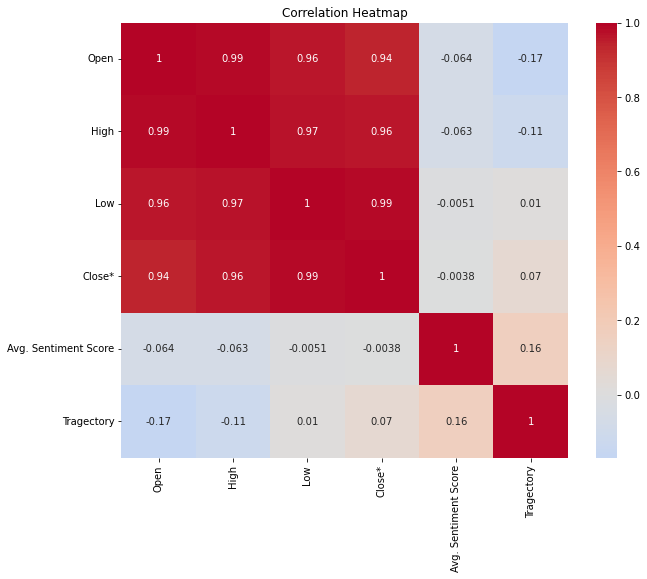

In [14]:
# Correlation map 
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()